In [100]:
# Proyecto Individual N°2
# Telecomunicaciones
# Alumno: Eduardo Bursese

# Análisis de los datos eploratorios de los archivos en formato Excel tomados del ENACOM

In [101]:
# import libraries to use
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# Analisis de la penetración de Internet
file_to_read = './raw_data/1_Internet_Penetracion.xlsx'

# Create an ExcelFile object
# Carga el archivo
xls = pd.ExcelFile(file_to_read)

# Get the sheet names
# obtiene los nombres de sus hojas
sheet_names = xls.sheet_names

# Print the sheet names
# se imprimen para seleccionar la deseada
print(sheet_names)

['Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Penetracion-hogares (2)']


In [103]:
# select the sheet to work on
file_to_read = './raw_data/1_Internet_Penetracion.xlsx'
df = pd.read_excel(file_to_read, sheet_name=2) # Total de penetración
print(df.head())

    Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2022          4                     77.210000                 24.150000   
1  2022          3                     76.640000                 23.950000   
2  2022          2                     75.965424                 23.720442   
3  2022          1                     73.878803                 23.049171   
4  2021          4                     73.176397                 22.810702   

         Periodo  
0   Oct-Dic 2022  
1  Jul-Sept 2022  
2   Abr-Jun 2022  
3   Ene-Mar 2022  
4   Oct-Dic 2021  


In [104]:
# check data types
# tipo de datos de las columnas
df.dtypes

Año                               int64
Trimestre                         int64
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
Periodo                          object
dtype: object

In [105]:
# groupby year and quarter to graph
# agrupo por año y trimestre
df_grouped = df.groupby(['Año','Trimestre']).sum().reset_index()
df_grouped.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2014,1,49.545821,15.050104,Ene-Mar 2014
1,2014,2,49.861428,15.163908,Abr-Jun 2014
2,2014,3,50.672368,15.428769,Jul-Sept 2014
3,2014,4,50.499788,15.394677,Oct-Dic 2014
4,2015,1,51.364586,15.677234,Ene-Mar 2015


In [106]:
# filter last 3 years
# filtro por los últimos 3 años
df_grouped_filtered=df_grouped[(df_grouped['Año']>=2019) & (df_grouped['Año']<=2022)].sort_values(['Año','Trimestre'])
df_grouped_filtered.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
20,2019,1,62.479166,19.307907,Ene-Mar 2019
21,2019,2,64.530000,19.960000,Abr-Jun 2019
22,2019,3,65.787985,20.360661,Jul-Sept 2019
23,2019,4,62.919912,19.487900,Oct-Dic 2019
24,2020,1,62.856361,19.483265,Ene-Mar 2020


In [107]:
# save the data frame
# se guarda para usar con PowerBI
df_grouped_filtered.to_excel('./raw_data/df_penetracion.xlsx', index=False)

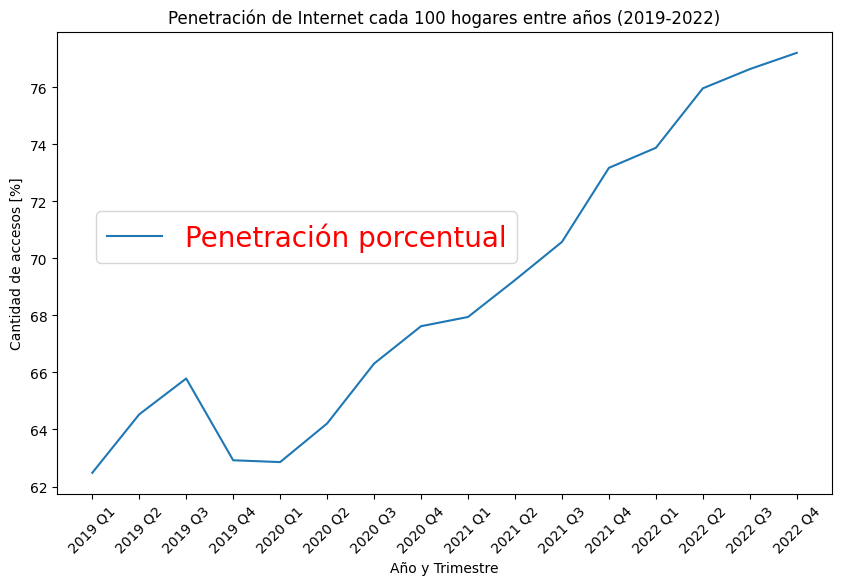

In [108]:
# Plot 'Penetración' over time for the filtered data to see the trend
# Se agrega un gráfico para la exploración
plt.figure(figsize=(10,6))
plt.plot(df_grouped_filtered['Año'].astype(str) + ' Q' + df_grouped_filtered['Trimestre'].astype(str), df_grouped_filtered['Accesos por cada 100 hogares'], label='Penetración porcentual')
plt.xlabel('Año y Trimestre')
plt.ylabel('Cantidad de accesos [%]')
plt.title('Penetración de Internet cada 100 hogares entre años (2019-2022)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
legend = plt.legend(prop={'size':20}, loc=(0.05,0.5))  # Add a legend
for text in legend.get_texts():
    text.set_color('red')
plt.show()

# Se observa claramente el aumento de % de hogares con servicio internet fijo.

In [109]:
# load a file
# cargamos 3_Internet_BAF.xlsx
file_to_read = './raw_data/3_Internet_BAF.xlsx'

# Create an ExcelFile object
xls = pd.ExcelFile(file_to_read)

# Get the sheet names
sheet_names = xls.sheet_names

# Print the sheet names
# venos que hojas tiene para seleccionar la deseada
print(sheet_names)

['Dial-BAf', 'Totales']


In [110]:
# select the sheet to work on
file_to_read = './raw_data/3_Internet_BAF.xlsx'
df3 = pd.read_excel(file_to_read, sheet_name=1) # seleccionamos Totales de banda ancha y dial up
print(df3.head())

    Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0  2022          4          11195668    12446  11208114   Oct-Dic 2022
1  2022          3          11078691    12437  11091128  Jul-Sept 2022
2  2022          2          10946248    12436  10958684   Abr-Jun 2022
3  2022          1          10611390    12619  10624009   Ene-Mar 2022
4  2021          4          10476933    12861  10489794   Oct-Dic 2021


In [111]:
# check data types
# revisamos los tipos de datos de las columnas
df3.dtypes

Año                  int64
Trimestre            int64
Banda ancha fija     int64
Dial up              int64
Total                int64
Periodo             object
dtype: object

In [112]:
# groupby year and quarter to graph
# agrupamos por año y trimestre
df3_grouped = df3.groupby(['Año','Trimestre']).sum().reset_index()

# filter last 3 years
# filtramos por los últimos 3 años
df3_grouped_filtered=df3_grouped[(df3_grouped['Año']>=2019) & (df3_grouped['Año']<=2022)].sort_values(['Año','Trimestre'])
df3_grouped_filtered.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
20,2019,1,8626323,21812,8648135,Ene-Mar 2019
21,2019,2,8938427,21754,8960181,Abr-Jun 2019
22,2019,3,9142891,21793,9164684,Jul-Sept 2019
23,2019,4,8783053,10128,8793181,Oct-Dic 2019
24,2020,1,8802435,9991,8812426,Ene-Mar 2020


In [113]:
# Save the file to use with PowerBI
# guardamos el data frame para usar con PowerBI
df3_grouped_filtered.to_excel('./raw_data/df3_BAncha.xlsx', index=False)

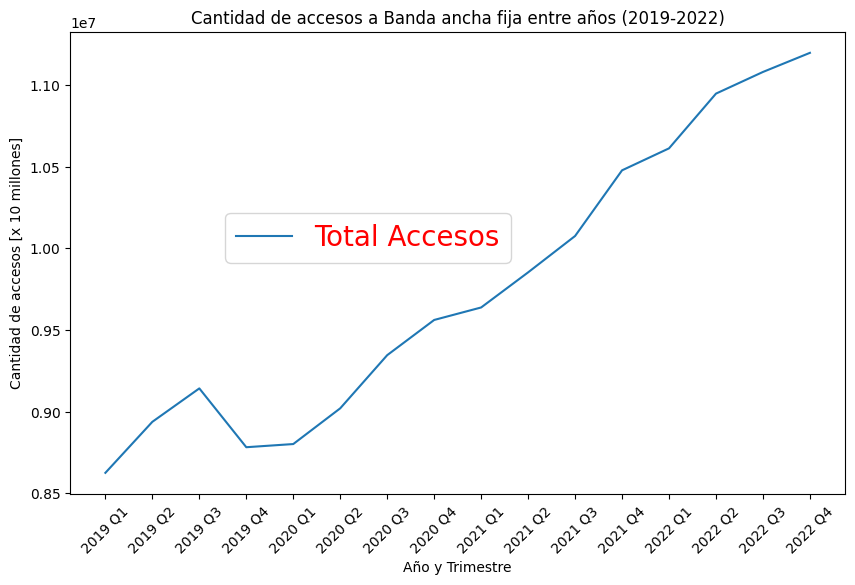

In [114]:
# Plot 'Banda Ancha' over time for the filtered data to see the trend
# Graficamos para analizar graficamente los resultados
plt.figure(figsize=(10,6))
plt.plot(df3_grouped_filtered['Año'].astype(str) + ' Q' + df3_grouped_filtered['Trimestre'].astype(str), df3_grouped_filtered['Banda ancha fija'], label='Total Accesos')
plt.xlabel('Año y Trimestre')
plt.ylabel('Cantidad de accesos [x 10 millones]')
plt.title('Cantidad de accesos a Banda ancha fija entre años (2019-2022)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
legend = plt.legend(prop={'size':20}, loc=(0.2,0.5))  # Add a legend
for text in legend.get_texts():
    text.set_color('red')
plt.show()

# nuevamente se obtiene como conclusión en aumento sostenido cada año de los puntos de accesos de internet fijo

In [115]:
# load 6_Internet_Accesos-por-tecnologia.xlsx
# Cargamos 6_Internet_Accesos-por-tecnologia.xlsx

file_to_read = './raw_data/6_Internet_Accesos-por-tecnologia.xlsx'

# Create an ExcelFile object
xls = pd.ExcelFile(file_to_read)

# Get the sheet names
sheet_names = xls.sheet_names

# Print the sheet names
# imprime sus hojas para seleccionar la adecuada
print(sheet_names)

['Totales', 'Accesos Por Tecnología']


In [116]:
# select the sheet to work on
file_to_read = './raw_data/6_Internet_Accesos-por-tecnologia.xlsx'
df6 = pd.read_excel(file_to_read, sheet_name=0) # tomamos la hoja Totales
print(df6.head())

    Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2022          4  1315373     6037457       3060575    572969  221740   
1  2022          3  1395277     6031970       2871541    557110  235230   
2  2022          2  1468333     5979214       2723285    556243  231609   
3  2022          1  1533240     6073426       2219533    545814  251996   
4  2021          4  1657615     5984240       2072236    523107  252596   

      Total        Periodo  
0  11208114   Oct-Dic 2022  
1  11091128  Jul-Sept 2022  
2  10958684   Abr-Jun 2022  
3  10624009   Ene-Mar 2022  
4  10489794   Oct-Dic 2021  


In [117]:
# check data types
df6.dtypes

Año              int64
Trimestre        int64
ADSL             int64
Cablemodem       int64
Fibra óptica     int64
Wireless         int64
Otros            int64
Total            int64
Periodo         object
dtype: object

In [118]:
# groupby year and quarter to graph
df6_grouped = df6.groupby(['Año','Trimestre']).sum().reset_index()

# filter last 3 years
df6_grouped_filtered=df6_grouped[(df6_grouped['Año']>=2019) & (df6_grouped['Año']<=2022)].sort_values(['Año','Trimestre'])
df6_grouped_filtered.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
20,2019,1,3132789,4435439,637099,276419,166389,8648135,Ene-Mar 2019
21,2019,2,2990457,4635575,760794,308027,265328,8960181,Abr-Jun 2019
22,2019,3,2909805,4800091,852221,338241,264326,9164684,Jul-Sept 2019
23,2019,4,2414575,4883869,941295,340144,213298,8793181,Oct-Dic 2019
24,2020,1,2299457,4903674,1047817,352333,209145,8812426,Ene-Mar 2020


In [119]:
df6_grouped_filtered2=df6_grouped[(df6_grouped['Año']>=2014) & (df6_grouped['Año']<=2022)].sort_values(['Año','Trimestre'])
df6_grouped_filtered2.to_excel('./raw_data/df6_tecnologia.xlsx', index=False)

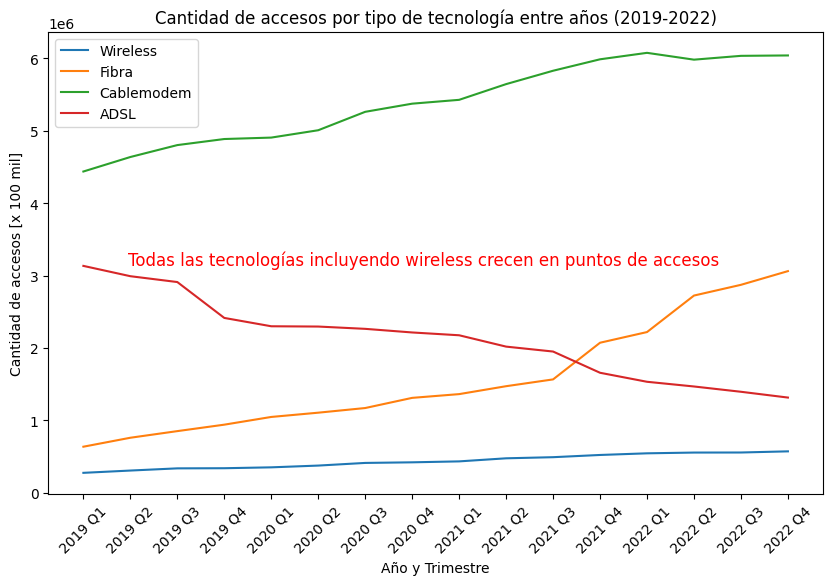

In [120]:
# Plot 'Accesos x Tecnología' over time for the filtered data to see the trend
plt.figure(figsize=(10,6))
plt.plot(df6_grouped_filtered['Año'].astype(str) + ' Q' + df6_grouped_filtered['Trimestre'].astype(str), df6_grouped_filtered['Wireless'], label='Wireless')
plt.plot(df6_grouped_filtered['Año'].astype(str) + ' Q' + df6_grouped_filtered['Trimestre'].astype(str), df6_grouped_filtered['Fibra óptica'], label='Fibra')
plt.plot(df6_grouped_filtered['Año'].astype(str) + ' Q' + df6_grouped_filtered['Trimestre'].astype(str), df6_grouped_filtered['Cablemodem'], label='Cablemodem')
plt.plot(df6_grouped_filtered['Año'].astype(str) + ' Q' + df6_grouped_filtered['Trimestre'].astype(str), df6_grouped_filtered['ADSL'], label='ADSL')
plt.xlabel('Año y Trimestre')
plt.ylabel('Cantidad de accesos [x 100 mil]')
plt.title('Cantidad de accesos por tipo de tecnología entre años (2019-2022)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()

# Agregar el comentario en el centro del gráfico
plt.text(0.5, 0.5, 'Todas las tecnologías incluyendo wireless crecen en puntos de accesos', color='red', fontsize='large', ha='center', va='center', transform=plt.gcf().transFigure)

plt.show()

In [121]:
file_to_read = './raw_data/8_historico_velocidad_internet_graph.xlsx'

# Create an ExcelFile object
xls = pd.ExcelFile(file_to_read)

# Get the sheet names
sheet_names = xls.sheet_names

# Print the sheet names
print(sheet_names)

['Velocidad % por prov', 'Totales']


In [122]:
# select the sheet to work on
file_to_read = './raw_data/8_historico_velocidad_internet_graph.xlsx'
df8 = pd.read_excel(file_to_read, sheet_name=1)
print(df8.head())

    Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2022          4                  106.56   Oct-Dic 2022
1  2022          3                   62.46  Jul-Sept 2022
2  2022          2                   58.44   Abr-Jun 2022
3  2022          1                   55.11   Ene-Mar 2022
4  2021          4                   52.34   Oct-Dic 2021


In [123]:
df8.dtypes

Año                         int64
Trimestre                   int64
Mbps (Media de bajada)    float64
Trimestre.1                object
dtype: object

In [124]:
df8_filtered = df8[(df8['Año']>=2019)].sort_values(['Año','Trimestre'])
df8_filtered

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
15,2019,1,17.38,Ene-Mar 2019
14,2019,2,20.33,Abr-Jun 2019
13,2019,3,24.18,Jul-Sept 2019
12,2019,4,28.26,Oct-Dic 2019
11,2020,1,37.52,Ene-Mar 2020
10,2020,2,38.32,Abr-Jun 2020
9,2020,3,40.67,Jul-Sept 2020
8,2020,4,42.36,Oct-Dic 2020
7,2021,1,43.11,Ene-Mar 2021
6,2021,2,45.63,Abr-Jun 2021


In [125]:
df8_filtered.to_excel('./raw_data/df8_Velocidad.xlsx', index=False)

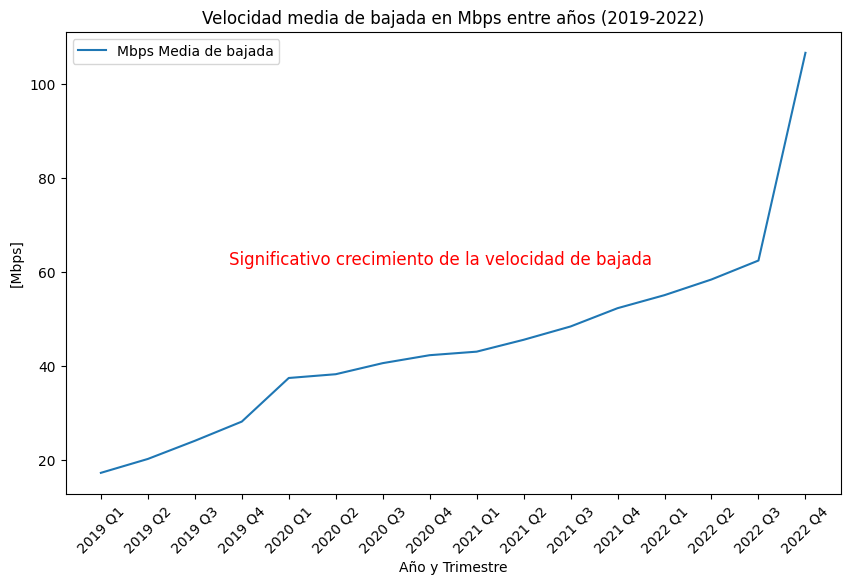

In [126]:
# Plot 'Mbps (Media de bajada)' over time for the filtered data to see the trend
plt.figure(figsize=(10,6))
plt.plot(df8_filtered['Año'].astype(str) + ' Q' + df8_filtered['Trimestre'].astype(str), df8_filtered['Mbps (Media de bajada)'], label='Mbps Media de bajada')
plt.xlabel('Año y Trimestre')
plt.ylabel('[Mbps]')
plt.title('Velocidad media de bajada en Mbps entre años (2019-2022)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()

# Agregar el comentario en el centro del gráfico
plt.text(0.5, 0.5, 'Significativo crecimiento de la velocidad de bajada', color='red', fontsize='large', ha='center', va='center', transform=plt.gcf().transFigure)

plt.show()

In [127]:
file_to_read = './raw_data/10_Internet_Accesos-por-velocidad_pie_graph.xlsx'

# Create an ExcelFile object
xls = pd.ExcelFile(file_to_read)

# Get the sheet names
sheet_names = xls.sheet_names

# Print the sheet names
print(sheet_names)

['Totales', 'Accesos por velocidad']


In [128]:
# select the sheet to work on
file_to_read = './raw_data/10_Internet_Accesos-por-velocidad_pie_graph.xlsx'
df10 = pd.read_excel(file_to_read, sheet_name=0)
print(df10.head())

    Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2022          4           31981                    85668   
1  2022          3           33013                    96727   
2  2022          2           33667                    99498   
3  2022          1           34890                   104840   
4  2021          4           41262                    28521   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                1075272                 1109421                   765015   
1                1161370                 1151906                   823505   
2                1193090                 1197030                   856562   
3                1263273                 1209148                   967508   
4                1413208                 1245333                   976539   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   335573         7410902  394282  11208114  
1                   479822      

In [129]:
df10.dtypes

Año                        int64
Trimestre                  int64
Hasta 512 kbps             int64
Entre 512 Kbps y 1 Mbps    int64
Entre 1 Mbps y 6 Mbps      int64
Entre 6 Mbps y 10 Mbps     int64
Entre 10 Mbps y 20 Mbps    int64
Entre 20 Mbps y 30 Mbps    int64
Más de 30 Mbps             int64
OTROS                      int64
Total                      int64
dtype: object

In [130]:
df10_filtered = df10[(df10['Año']>=2019)].sort_values(['Año','Trimestre'])
df10_filtered.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
15,2019,1,166573,195706,3428759,882836,1464748,1244215,1138728,126570,8648135
14,2019,2,202790,95980,3444458,871142,1169632,1250366,1677830,247983,8960181
13,2019,3,241713,80599,3309137,1026859,806466,1141545,2314898,243467,9164684
12,2019,4,38272,28980,2792307,1046128,851619,1004083,2830746,201046,8793181
11,2020,1,42550,56170,2649819,1022014,814470,532309,3500882,194212,8812426


In [131]:
df10_filtered.to_excel('./raw_data/df10_RangosVel.xlsx', index=False)

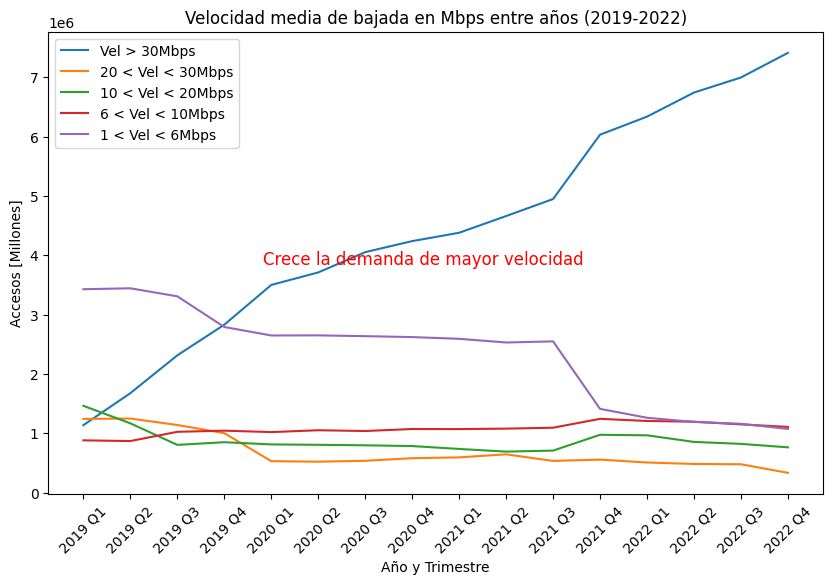

In [132]:
# Plot 'Rangos de velocidad de bajada (Mbps)' over time for the filtered data to see the trend
plt.figure(figsize=(10,6))
plt.plot(df10_filtered['Año'].astype(str) + ' Q' + df10_filtered['Trimestre'].astype(str), df10_filtered['Más de 30 Mbps'], label='Vel > 30Mbps')
plt.plot(df10_filtered['Año'].astype(str) + ' Q' + df10_filtered['Trimestre'].astype(str), df10_filtered['Entre 20 Mbps y 30 Mbps'], label='20 < Vel < 30Mbps')

plt.plot(df10_filtered['Año'].astype(str) + ' Q' + df10_filtered['Trimestre'].astype(str), df10_filtered['Entre 10 Mbps y 20 Mbps'], label='10 < Vel < 20Mbps')
plt.plot(df10_filtered['Año'].astype(str) + ' Q' + df10_filtered['Trimestre'].astype(str), df10_filtered['Entre 6 Mbps y 10 Mbps'], label='6 < Vel < 10Mbps')
plt.plot(df10_filtered['Año'].astype(str) + ' Q' + df10_filtered['Trimestre'].astype(str), df10_filtered['Entre 1 Mbps y 6 Mbps'], label='1 < Vel < 6Mbps')

plt.xlabel('Año y Trimestre')
plt.ylabel('Accesos [Millones]')
plt.title('Velocidad media de bajada en Mbps entre años (2019-2022)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()

# Agregar el comentario en el centro del gráfico
plt.text(0.5, 0.5, 'Crece la demanda de mayor velocidad', color='red', fontsize='large', ha='center', va='center', transform=plt.gcf().transFigure)

plt.show()

In [133]:
file_to_read = './raw_data/16_mapa_conectividad.xlsx'

# Create an ExcelFile object
xls = pd.ExcelFile(file_to_read)

# Get the sheet names
sheet_names = xls.sheet_names

# Print the sheet names
print(sheet_names)

['Hoja3']


In [134]:
# select the sheet to work on
file_to_read = './raw_data/16_mapa_conectividad.xlsx'
df16 = pd.read_excel(file_to_read, sheet_name=0)
print(df10.head())

    Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2022          4           31981                    85668   
1  2022          3           33013                    96727   
2  2022          2           33667                    99498   
3  2022          1           34890                   104840   
4  2021          4           41262                    28521   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                1075272                 1109421                   765015   
1                1161370                 1151906                   823505   
2                1193090                 1197030                   856562   
3                1263273                 1209148                   967508   
4                1413208                 1245333                   976539   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   335573         7410902  394282  11208114  
1                   479822      

In [135]:
df16.dtypes

Provincia          object
Partido            object
Localidad          object
Población           int64
ADSL               object
Cablemódem         object
Dial Up            object
Fibra óptica       object
Satelital          object
Wireless           object
Telefonía Fija     object
3G                 object
4G                 object
Link              float64
Latitud           float64
Longitud          float64
dtype: object

In [136]:

# List of columns to replace '--' with 'NO'
columns = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless']

# Replace '--' with 'NO' in the specified columns
for col in columns:
    df16[col] =df16[col].str.strip()
    df16[col] = df16[col].replace('--', 0)
    df16[col] = df16[col].replace('SI', 1)
df16 = df16.drop(['Telefonía Fija', '3G', '4G'], axis=1)
df16.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,0,0,0,0,0,0,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,1,0,0,1,0,0,6588060.0,-35.520141,-60.998949


In [137]:
df16_grouped = df16.groupby(['Provincia']).sum().reset_index()
df16_grouped.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio9 de Julio9 de Julio9 de Julio9 de J...,Alfredo Demarchi (Est. Facundo Quiroga)Carlos ...,14911542,356,342,213,463,155,502,5.805351e+09,-32105.989222,-53785.548973
1,CABA,COMUNA 12COMUNA 12COMUNA 13COMUNA 13COMUNA 13C...,VILLA PUEYRREDONVILLA URQUIZABELGRANOCOLEGIALE...,2890151,48,48,48,48,48,48,9.600048e+07,-1661.412697,-2805.607355
2,CATAMARCA,AmbatoAmbatoAncastiAncastiAncastiAncastiAndalg...,Los VarelaSinguilAncastiAnquincilaLa Candelari...,343343,7,1,1,23,47,34,1.831904e+09,-5091.037727,-12035.139426
3,CHACO,Almirante BrownBermejoBermejoBermejoBermejoBer...,Taco PozoGeneral VediaIsla del CerritoLa Leone...,927414,28,12,1,45,42,46,2.031663e+09,-2471.311112,-5534.270797
4,CHUBUT,BiedmaCushamenCushamenCushamenCushamenCushamen...,Reserva Area Protegida El DoradilloBuenos Aire...,490554,14,10,15,13,49,31,2.343762e+09,-3966.943656,-6180.088770


In [138]:
df16_grouped.to_excel('./raw_data/df16_TipoTecProv.xlsx', index=False)

<Figure size 1000x600 with 0 Axes>

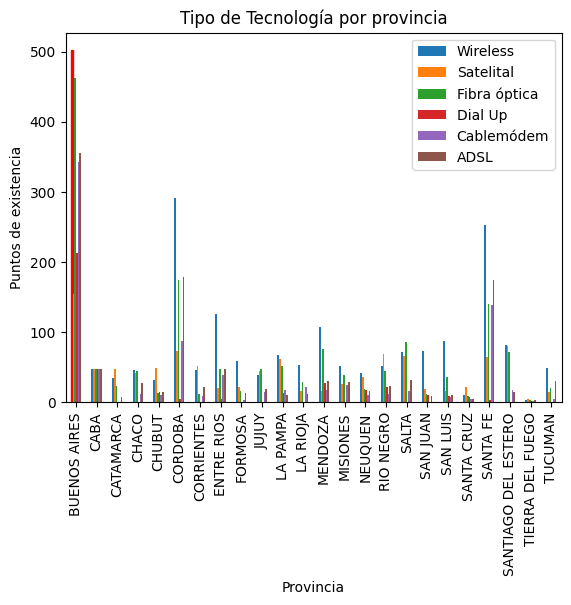

In [139]:
# set Provincia as x's labels
df16_grouped.set_index('Provincia', inplace=True)

# List of columns to plot
columns = ['Wireless', 'Satelital', 'Fibra óptica', 'Dial Up', 'Cablemódem', 'ADSL']

plt.figure(figsize=(10,6))

# Create a bar plot
ax = df16_grouped[columns].plot(kind='bar')

# Set the color for the 'Wireless' bars to red
ax.get_children()[0].set_color('red')

# titles for the axis
plt.title('Tipo de Tecnología por provincia')
plt.ylabel('Puntos de existencia')

# Display the plot
plt.show()

In [140]:
df16_grouped['Total'] = df16_grouped[['Satelital', 'Fibra óptica', 'Dial Up', 'Cablemódem', 'ADSL']].sum(axis=1)
df16_grouped.head()

,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Link,Latitud,Longitud,Total
Provincia,,,,,,,,,,,,,
BUENOS AIRES,9 de Julio9 de Julio9 de Julio9 de Julio9 de J...,Alfredo Demarchi (Est. Facundo Quiroga)Carlos ...,14911542,356,342,213,463,155,502,5.805351e+09,-32105.989222,-53785.548973,1529
CABA,COMUNA 12COMUNA 12COMUNA 13COMUNA 13COMUNA 13C...,VILLA PUEYRREDONVILLA URQUIZABELGRANOCOLEGIALE...,2890151,48,48,48,48,48,48,9.600048e+07,-1661.412697,-2805.607355,240
CATAMARCA,AmbatoAmbatoAncastiAncastiAncastiAncastiAndalg...,Los VarelaSinguilAncastiAnquincilaLa Candelari...,343343,7,1,1,23,47,34,1.831904e+09,-5091.037727,-12035.139426,79
CHACO,Almirante BrownBermejoBermejoBermejoBermejoBer...,Taco PozoGeneral VediaIsla del CerritoLa Leone...,927414,28,12,1,45,42,46,2.031663e+09,-2471.311112,-5534.270797,128
CHUBUT,BiedmaCushamenCushamenCushamenCushamenCushamen...,Reserva Area Protegida El DoradilloBuenos Aire...,490554,14,10,15,13,49,31,2.343762e+09,-3966.943656,-6180.088770,101


In [141]:
df16_grouped.columns

Index(['Partido', 'Localidad', 'Población', 'ADSL', 'Cablemódem', 'Dial Up',
       'Fibra óptica', 'Satelital', 'Wireless', 'Link', 'Latitud', 'Longitud',
       'Total'],
      dtype='object')

In [142]:
df16_grouped.to_excel('./raw_data/df16_TipoTecProv2.xlsx', index=False)

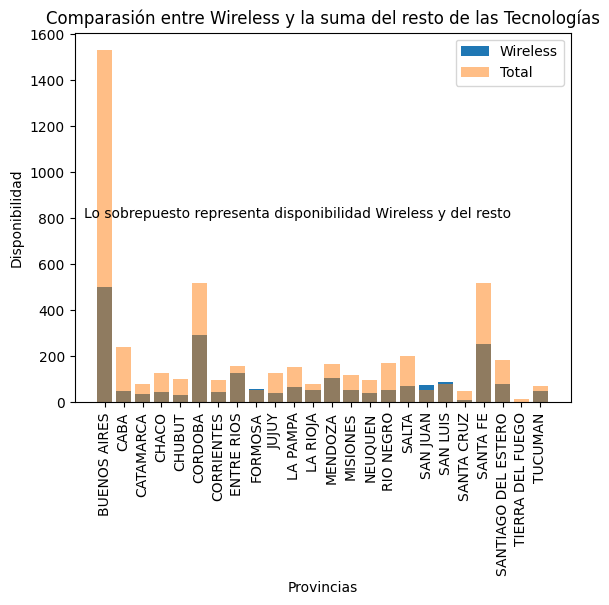

In [143]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar chart for 'Wireless' column
ax.bar(df16_grouped.index, df16_grouped['Wireless'], label='Wireless')

# Create a bar chart for 'Total' column
ax.bar(df16_grouped.index, df16_grouped['Total'], label='Total', alpha=0.5)

# Set labels for x and y axis
ax.set_xlabel('Provincias')
ax.set_ylabel('Disponibilidad')

# rotate the labels on x-axis
plt.xticks(rotation=90)

# Set a title for the chart
ax.set_title('Comparasión entre Wireless y la suma del resto de las Tecnologías')

# Add a legend
ax.legend()

# Add a text annotation to explain the overlap
plt.text(0.02, 0.5, 'Lo sobrepuesto representa disponibilidad Wireless y del resto', transform=ax.transAxes)

# Show the plot
plt.show()

In [144]:
# check the Television.xlsx to add as a new KPI

file_to_read = './raw_data/Television.xlsx'

# Create an ExcelFile object
xls = pd.ExcelFile(file_to_read)

# Get the sheet names
sheet_names = xls.sheet_names

# Print the sheet names
print(sheet_names)

['Accesos_prov_TV', 'Accesos_totales_TV', 'Ingresos_TV', 'Penetracion_prov_TV', 'Penetracion_totales_TV']


In [145]:
# select the sheet to work on
file_to_read = './raw_data/Television.xlsx'
dftv = pd.read_excel(file_to_read, sheet_name=1)
print(dftv.head())

    Año  Trimestre  Accesos TV por suscripción  Accesos TV satelital  \
0  2022          4                     7680025               1837878   
1  2022          3                     7665931               2064699   
2  2022          2                     7647584               2064637   
3  2022          1                     7564827               2049628   
4  2021          4                     7596758               2010217   

        Periodo   
0   Oct-Dic 2022  
1  Jul-Sept 2022  
2   Abr-Jun 2022  
3   Ene-Mar 2022  
4   Oct-Dic 2021  


In [146]:
dftv.dtypes

Año                            int64
Trimestre                      int64
Accesos TV por suscripción     int64
Accesos TV satelital           int64
 Periodo                      object
dtype: object

In [147]:
dftv_grouped = dftv.groupby(['Año','Trimestre']).sum().reset_index()
dftv_grouped_filtered = dftv_grouped[(dftv_grouped['Año']>=2019)]

dftv_grouped_filtered.head()

,Año,Trimestre,Accesos TV por suscripción,Accesos TV satelital,Periodo
19,2019,1,6971691,2473124,Ene-Mar 2019
20,2019,2,7048709,2460177,Abr-Jun 2019
21,2019,3,7156690,2460927,Jul-Sept 2019
22,2019,4,7296185,2459872,Oct-Dic 2019
23,2020,1,7221911,2456768,Ene-Mar 2020


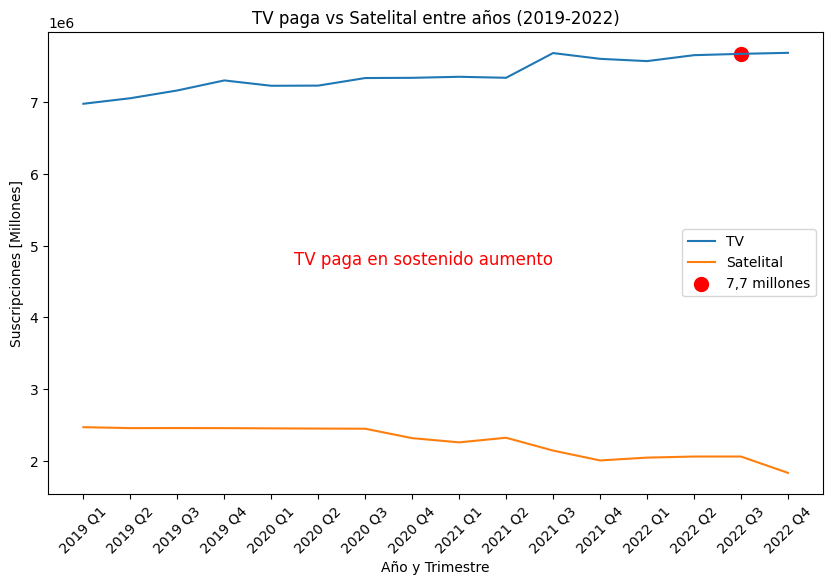

In [148]:
# Plot 'Penetración de la TV paga' over time for the filtered data to see the trend
plt.figure(figsize=(10, 6))
plt.plot(dftv_grouped_filtered['Año'].astype(str) + ' Q' + dftv_grouped_filtered['Trimestre'].astype(str), dftv_grouped_filtered['Accesos TV por suscripción'], label='TV')
plt.plot(dftv_grouped_filtered['Año'].astype(str) + ' Q' + dftv_grouped_filtered['Trimestre'].astype(str), dftv_grouped_filtered['Accesos TV satelital'], label='Satelital')

# Change the point added on the line of 'Accesos TV por suscripción'
plt.scatter('2022 Q3', dftv_grouped_filtered.loc[(dftv_grouped_filtered['Año'] == 2022) & (dftv_grouped_filtered['Trimestre'] == 3), 'Accesos TV por suscripción'], color='red', label='7,7 millones', s=100)

plt.xlabel('Año y Trimestre')
plt.ylabel('Suscripciones [Millones]')
plt.title('TV paga vs Satelital entre años (2019-2022)')
plt.xticks(rotation=45)
plt.legend()

# Agregar el comentario en el centro del gráfico
plt.text(0.5, 0.5, 'TV paga en sostenido aumento', color='red', fontsize='large', ha='center', va='center', transform=plt.gcf().transFigure)

plt.show()

In [149]:
dftv_grouped_filtered.to_excel('./raw_data/dftv_TV.xlsx', index=False)

In [150]:
# check the 13_Internet_Ingresos_graph.xlsx to add to the dashboard

file_to_read = './raw_data/13_Internet_Ingresos_graph.xlsx'

# Create an ExcelFile object
xls = pd.ExcelFile(file_to_read)

# Get the sheet names
sheet_names = xls.sheet_names

# Print the sheet names
print(sheet_names)

['Ingresos']


In [151]:
# select the sheet to work on
file_to_read = './raw_data/13_Internet_Ingresos_graph.xlsx'
df13_ing = pd.read_excel(file_to_read)
print(df13_ing.head())

    Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2022          4               7.244348e+07   Oct-Dic 2022
1  2022          3               6.408678e+07  Jul-Sept 2022
2  2022          2               6.041950e+07   Abr-Jun 2022
3  2022          1               5.521931e+07   Ene-Mar 2022
4  2021          4               4.546789e+07   Oct-Dic 2021


In [152]:
# check datatypes
# revisar tipos de datos

df13_ing.dtypes

Año                            int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
Periodo                       object
dtype: object

In [153]:
# change units of the column
# cambi0 las unidades de la columna
df13_ing['Ingresos (milones de pesos)'] = (df13_ing['Ingresos (miles de pesos)'] / 1000000).astype(int)

In [154]:
df13_ing.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos (milones de pesos)
0,2022,4,7.244348e+07,Oct-Dic 2022,72
1,2022,3,6.408678e+07,Jul-Sept 2022,64
2,2022,2,6.041950e+07,Abr-Jun 2022,60
3,2022,1,5.521931e+07,Ene-Mar 2022,55
4,2021,4,4.546789e+07,Oct-Dic 2021,45


In [155]:
# delete columns unusefull to join later the table
# preparo la tabla para unirla a otras y elimino las columnas que no usaré
df13_ing = df13_ing.drop(['Ingresos (miles de pesos)', 'Periodo'], axis=1)

In [156]:
# filter by year & Trimestre
df13_ing_filtered = df13_ing[(df13_ing['Año']>=2019) & (df13_ing['Trimestre']== 4)]

In [157]:
# final check
df13_ing_filtered.head()

,Año,Trimestre,Ingresos (milones de pesos)
0,2022,4,72
4,2021,4,45
8,2020,4,33
12,2019,4,24


In [158]:
dftv_grouped_filtered.to_excel('./raw_data/dftv_TV.xlsx', index=False)

In [159]:
# df es penetración
# df8 velocidad
# df13 ingresos

# df3 es BA
# df6 por tecnología
# df10 acc x vel 

In [160]:
df = df.drop(['Accesos por cada 100 hab','Periodo'], axis=1)

In [161]:
df ['Acc_cada_100_hogares[%]'] = df['Accesos por cada 100 hogares'].astype(int)

In [162]:
df = df.drop(['Accesos por cada 100 hogares'], axis=1)

In [163]:
df_filtered = df[(df['Año']>=2019) & (df['Trimestre']== 4)]

In [164]:
df_filtered.head()

,Año,Trimestre,Acc_cada_100_hogares[%]
0,2022,4,77
4,2021,4,73
8,2020,4,67
12,2019,4,62


In [165]:
# join df (Penetracion) with df13 (ingresos)
# uno las tablas de penetracipon e ingresos para crear una sola unificada para Power BI
df_merged = df13_ing_filtered.merge(df_filtered, on='Año')

In [166]:
df_merged = df_merged.drop(['Trimestre_x','Trimestre_y'], axis=1)


In [167]:
df_merged.head()

,Año,Ingresos (milones de pesos),Acc_cada_100_hogares[%]
0,2022,72,77
1,2021,45,73
2,2020,33,67
3,2019,24,62


In [168]:
# df_merged es penetración+ingresos
# df8 velocidad

# df3 es BA
# df6 por tecnología
# df10 acc x vel 

In [169]:
# work on Df3 Banda Ancha to do same process to join
# trabajo sobre la tabla Banda Ancha para hacer el mismo proceso de unión
df3 = df3.drop(['Periodo','Total'], axis = 1)
df3_filtered = df3[(df3['Año'] >= 2019) & (df3['Trimestre'] == 4)]
df3_filtered = df3_filtered.drop(['Trimestre'],axis=1)
df3_filtered.head()

,Año,Banda ancha fija,Dial up
0,2022,11195668,12446
4,2021,10476933,12861
8,2020,9561546,10016
12,2019,8783053,10128


In [170]:
# join df (Penetracion+Ingresos) with df3 (BandaAncha)
# uno las tablas de penetracipon + ingresos Banda Ancha para crear una sola unificada para Power BI
df_merged2 = df_merged.merge(df3_filtered, on='Año')
df_merged2.head()

,Año,Ingresos (milones de pesos),Acc_cada_100_hogares[%],Banda ancha fija,Dial up
0,2022,72,77,11195668,12446
1,2021,45,73,10476933,12861
2,2020,33,67,9561546,10016
3,2019,24,62,8783053,10128


In [171]:
# df_merged es (penetración + ingresos + bandaAncha)
# df8 velocidad

# df6 por tecnología
# df10 acc x vel 

In [172]:
# work on Df6 tecnología to do same process to join
# trabajo sobre la tabla Tecnologia para hacer el mismo proceso de unión

df6 = df6.drop(['Periodo','Total','Otros'], axis = 1)
df6_filtered = df6[(df6['Año'] >= 2019) & (df6['Trimestre'] == 4)]
df6_filtered = df6_filtered.drop(['Trimestre'],axis=1)
df6_filtered.head()

,Año,ADSL,Cablemodem,Fibra óptica,Wireless
0,2022,1315373,6037457,3060575,572969
4,2021,1657615,5984240,2072236,523107
8,2020,2213949,5371824,1311199,421554
12,2019,2414575,4883869,941295,340144


In [173]:
# join df (Penetracion + Ingresos + BandaAncha) with df6 (Tecnologia)
# uno las tablas de (penetracipon + ingresos + Banda Ancha + Tecnoloigia)
# para crear una sola unificada para Power BI
df_merged3 = df_merged2.merge(df6_filtered, on='Año')
df_merged3.head()

,Año,Ingresos (milones de pesos),Acc_cada_100_hogares[%],Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,Wireless
0,2022,72,77,11195668,12446,1315373,6037457,3060575,572969
1,2021,45,73,10476933,12861,1657615,5984240,2072236,523107
2,2020,33,67,9561546,10016,2213949,5371824,1311199,421554
3,2019,24,62,8783053,10128,2414575,4883869,941295,340144


In [174]:
# df_merged3 es (penetración + ingresos + bandaAncha + Tecnologia)
# df8 velocidad

# df10 acc x vel 

In [175]:
# work on Df8 Velocida de bajada to do same process to join
# trabajo sobre la tabla Velocidad de bajada para hacer el mismo proceso de unión

df8 = df8.drop(['Trimestre.1'], axis = 1)
df8_filtered = df8[(df8['Año'] >= 2019) & (df8['Trimestre'] == 4)]
df8_filtered = df8_filtered.drop(['Trimestre'],axis=1)
df8_filtered.head()

,Año,Mbps (Media de bajada)
0,2022,106.56
4,2021,52.34
8,2020,42.36
12,2019,28.26


In [176]:
# join df (Penetracion + Ingresos + BandaAncha + Tecnologia) with Velocidad
# uno las tablas de (penetracipon + ingresos + Banda Ancha + Tecnoloigia + Velocidad)
# para crear una sola unificada para Power BI
df_merged4 = df_merged3.merge(df8_filtered, on='Año')
df_merged4.head()

,Año,Ingresos (milones de pesos),Acc_cada_100_hogares[%],Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,Wireless,Mbps (Media de bajada)
0,2022,72,77,11195668,12446,1315373,6037457,3060575,572969,106.56
1,2021,45,73,10476933,12861,1657615,5984240,2072236,523107,52.34
2,2020,33,67,9561546,10016,2213949,5371824,1311199,421554,42.36
3,2019,24,62,8783053,10128,2414575,4883869,941295,340144,28.26


In [177]:
# work on Df10 Accesos por velocidad to do same process to join
# trabajo sobre la tabla Accesos por rangos de Velocidad para hacer el mismo proceso de unión

df10 = df10.drop(['Total','OTROS','Hasta 512 kbps','Entre 512 Kbps y 1 Mbps'], axis = 1)
df10_filtered = df10[(df10['Año'] >= 2019) & (df10['Trimestre'] == 4)]
df10_filtered = df10_filtered.drop(['Trimestre'],axis=1)
df10_filtered.head()

,Año,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps
0,2022,1075272,1109421,765015,335573,7410902
4,2021,1413208,1245333,976539,558358,6032322
8,2020,2622638,1073875,786595,582420,4239237
12,2019,2792307,1046128,851619,1004083,2830746


In [178]:
# join df (Penetracion + Ingresos + BandaAncha + Tecnologia + Velocidad) with Acc x Vel
# uno las tablas de (penetracipon + ingresos + Banda Ancha + Tecnoloigia + Velocidad + AccVel)
# para crear una sola unificada para Power BI
df_merged5 = df_merged4.merge(df10_filtered, on='Año')
df_merged5.head()

,Año,Ingresos (milones de pesos),Acc_cada_100_hogares[%],Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,Wireless,Mbps (Media de bajada),Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps
0,2022,72,77,11195668,12446,1315373,6037457,3060575,572969,106.56,1075272,1109421,765015,335573,7410902
1,2021,45,73,10476933,12861,1657615,5984240,2072236,523107,52.34,1413208,1245333,976539,558358,6032322
2,2020,33,67,9561546,10016,2213949,5371824,1311199,421554,42.36,2622638,1073875,786595,582420,4239237
3,2019,24,62,8783053,10128,2414575,4883869,941295,340144,28.26,2792307,1046128,851619,1004083,2830746


In [179]:
# calculate the growth rate of velocidad > 30Mbps and adecuate the column for future use un PBI
# calculo el crecimiento de la velocidad > 30Mbps para usarlo en Power BI

df_merged5.at[0, 'Crecimiento Vel>30Mbps'] = ((df_merged5.at[0, 'Más de 30 Mbps'] / df_merged5.at[1, 'Más de 30 Mbps']) - 1) * 100
df_merged5.at[1, 'Crecimiento Vel>30Mbps'] = ((df_merged5.at[1, 'Más de 30 Mbps'] / df_merged5.at[2, 'Más de 30 Mbps']) - 1) * 100
df_merged5.at[2, 'Crecimiento Vel>30Mbps'] = ((df_merged5.at[2, 'Más de 30 Mbps'] / df_merged5.at[3, 'Más de 30 Mbps']) - 1) * 100

df_merged5['Crecimiento Vel>30Mbps'].fillna(53, inplace=True)
df_merged5['Crecimiento Vel>30Mbps'] = df_merged5['Crecimiento Vel>30Mbps'].astype(int)
df_merged5.head()


,Año,Ingresos (milones de pesos),Acc_cada_100_hogares[%],Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,Wireless,Mbps (Media de bajada),Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Crecimiento Vel>30Mbps
0,2022,72,77,11195668,12446,1315373,6037457,3060575,572969,106.56,1075272,1109421,765015,335573,7410902,22
1,2021,45,73,10476933,12861,1657615,5984240,2072236,523107,52.34,1413208,1245333,976539,558358,6032322,42
2,2020,33,67,9561546,10016,2213949,5371824,1311199,421554,42.36,2622638,1073875,786595,582420,4239237,49
3,2019,24,62,8783053,10128,2414575,4883869,941295,340144,28.26,2792307,1046128,851619,1004083,2830746,53


In [180]:
df_merged5.at[0, 'Crecimiento Wireless'] = ((df_merged5.at[0, 'Wireless'] / df_merged5.at[1, 'Wireless']) - 1) * 100
df_merged5.at[1, 'Crecimiento Wireless'] = ((df_merged5.at[1, 'Wireless'] / df_merged5.at[2, 'Wireless']) - 1) * 100
df_merged5.at[2, 'Crecimiento Wireless'] = ((df_merged5.at[2, 'Wireless'] / df_merged5.at[3, 'Wireless']) - 1) * 100
df_merged5.at[3, 'Crecimiento Wireless'] = 29
df_merged5['Crecimiento Wireless'] = df_merged5['Crecimiento Wireless'].astype(int)
df_merged5.head()

,Año,Ingresos (milones de pesos),Acc_cada_100_hogares[%],Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,Wireless,Mbps (Media de bajada),Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Crecimiento Vel>30Mbps,Crecimiento Wireless
0,2022,72,77,11195668,12446,1315373,6037457,3060575,572969,106.56,1075272,1109421,765015,335573,7410902,22,9
1,2021,45,73,10476933,12861,1657615,5984240,2072236,523107,52.34,1413208,1245333,976539,558358,6032322,42,24
2,2020,33,67,9561546,10016,2213949,5371824,1311199,421554,42.36,2622638,1073875,786595,582420,4239237,49,23
3,2019,24,62,8783053,10128,2414575,4883869,941295,340144,28.26,2792307,1046128,851619,1004083,2830746,53,29


In [181]:
# add TV paga to the table
# se agrega la tabla de TV paga para usar con PBI
#dftv = dftv.drop(['Accesos TV satelital'], axis = 1)
dftv_filtered = dftv.loc[(df10['Año'] >= 2019) & (df10['Trimestre'] == 4)]
dftv_filtered = dftv_filtered.drop(['Trimestre'],axis=1)
dftv_filtered.head()

,Año,Accesos TV por suscripción,Accesos TV satelital,Periodo
0,2022,7680025,1837878,Oct-Dic 2022
4,2021,7596758,2010217,Oct-Dic 2021
8,2020,7332508,2320365,Oct-Dic 2020
12,2019,7296185,2459872,Oct-Dic 2019


In [182]:
dftv_filtered1 = dftv_filtered.copy()

In [183]:
dftv_filtered1 = dftv_filtered1.drop(['Accesos TV satelital',' Periodo '],axis=1)

In [184]:
dftv_filtered1.head()

,Año,Accesos TV por suscripción
0,2022,7680025
4,2021,7596758
8,2020,7332508
12,2019,7296185


In [185]:
# join df (Penetracion + Ingresos + BandaAncha + Tecnologia + Velocidad + AccXVel) with TV paga
# uno las tablas de (penetracipon + ingresos + Banda Ancha + Tecnoloigia + Velocidad + AccVel + TVpaga)
# para crear una sola unificada para Power BI
df_merged6 = df_merged5.merge(dftv_filtered1, on='Año')
df_merged6.head()

,Año,Ingresos (milones de pesos),Acc_cada_100_hogares[%],Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,Wireless,Mbps (Media de bajada),Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Crecimiento Vel>30Mbps,Crecimiento Wireless,Accesos TV por suscripción
0,2022,72,77,11195668,12446,1315373,6037457,3060575,572969,106.56,1075272,1109421,765015,335573,7410902,22,9,7680025
1,2021,45,73,10476933,12861,1657615,5984240,2072236,523107,52.34,1413208,1245333,976539,558358,6032322,42,24,7596758
2,2020,33,67,9561546,10016,2213949,5371824,1311199,421554,42.36,2622638,1073875,786595,582420,4239237,49,23,7332508
3,2019,24,62,8783053,10128,2414575,4883869,941295,340144,28.26,2792307,1046128,851619,1004083,2830746,53,29,7296185


In [186]:
df_merged6.at[0, 'Crecimiento TV'] = ((df_merged6.at[0, 'Accesos TV por suscripción'] / df_merged6.at[1, 'Accesos TV por suscripción']) - 1) * 100
df_merged6.at[1, 'Crecimiento TV'] = ((df_merged6.at[1, 'Accesos TV por suscripción'] / df_merged6.at[2, 'Accesos TV por suscripción']) - 1) * 100
df_merged6.at[2, 'Crecimiento TV'] = ((df_merged6.at[2, 'Accesos TV por suscripción'] / df_merged6.at[3, 'Accesos TV por suscripción']) - 1) * 100
df_merged6.at[3, 'Crecimiento TV'] = 6
df_merged6['Crecimiento TV'] = df_merged6['Crecimiento TV'].astype(int)
df_merged6.head()

,Año,Ingresos (milones de pesos),Acc_cada_100_hogares[%],Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,Wireless,Mbps (Media de bajada),Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Crecimiento Vel>30Mbps,Crecimiento Wireless,Accesos TV por suscripción,Crecimiento TV
0,2022,72,77,11195668,12446,1315373,6037457,3060575,572969,106.56,1075272,1109421,765015,335573,7410902,22,9,7680025,1
1,2021,45,73,10476933,12861,1657615,5984240,2072236,523107,52.34,1413208,1245333,976539,558358,6032322,42,24,7596758,3
2,2020,33,67,9561546,10016,2213949,5371824,1311199,421554,42.36,2622638,1073875,786595,582420,4239237,49,23,7332508,0
3,2019,24,62,8783053,10128,2414575,4883869,941295,340144,28.26,2792307,1046128,851619,1004083,2830746,53,29,7296185,6


In [187]:
# save the merged final data set to work with PBI
# salvo el data set final para trabajar con Power BI
df_merged6.to_excel('./raw_data/df_pbi.xlsx', index=False)

In [188]:
# Analisis de la penetración de Internet
file_to_read = './raw_data/1_Internet_Penetracion.xlsx'

# Create an ExcelFile object
# Carga el archivo
xls = pd.ExcelFile(file_to_read)

# Get the sheet names
# obtiene los nombres de sus hojas
sheet_names = xls.sheet_names

# Print the sheet names
# se imprimen para seleccionar la deseada
print(sheet_names)

['Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Penetracion-hogares (2)']


In [189]:
# select the sheet to work on
file_to_read = './raw_data/1_Internet_Penetracion.xlsx'
df = pd.read_excel(file_to_read, sheet_name=3) # Total de penetración
print(df.head())

         Provincia  Accesos por cada 100 hogares  \
0     Buenos Aires                         78.94   
1  Capital Federal                        122.73   
2        Catamarca                         65.77   
3            Chaco                         43.62   
4           Chubut                         85.57   

   Crecimiento Penetración promedio % 2019-2022  
0                                           1.3  
1                                           0.8  
2                                           4.7  
3                                           1.9  
4                                           4.6  


In [190]:
df_sumary = df.describe()
df_sumary['Crecimiento Penetración promedio % 2019-2022'] = df_sumary['Crecimiento Penetración promedio % 2019-2022'].round(1)
df_sumary['Accesos por cada 100 hogares'] = df_sumary['Accesos por cada 100 hogares'].round(1)
df_sumary

,Accesos por cada 100 hogares,Crecimiento Penetración promedio % 2019-2022
count,24.0,24.0
mean,69.0,2.3
std,21.1,1.1
min,39.4,0.8
25%,51.6,1.6
50%,64.9,2.0
75%,81.3,2.6
max,122.7,4.7


In [191]:
# save the data set to work with PBI
# salvo el data set estadístico de la Penetración en hogares para trabajar con Power BI
df_sumary.to_excel('./raw_data/df_sumary.xlsx', index=False)